<a href="https://colab.research.google.com/github/SofiaShvedova/Data-analytics-tools-for-solving-applied-problems/blob/main/marketing_analytics_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Постановка задачи**

Директор по маркетингу сообщил нам, что недавние маркетинговые иссследования оказались не такими эффективными, как ожидалось. Нам нужно проанализировать набор данных, чтобы понять проблему.

Исследовательский анализ данных

* Имеются ли нулевые значения или выбросы? 
* Существуют ли какие-либо переменные, требующие преобразований?
* Есть ли какие-нибудь полезные переменные, которые вы можете спроектировать с заданными данными?

Статистический анализ

* Какие факторы  связаны с количеством покупок в магазине?
* С точки зрения общего объема покупок дела в США значительно лучше, чем в остальном мире?


Визуализация данных

* Какая маркетинговая кампания наиболее успешна?
* Как выглядит средний клиент этой компании?
* Какие продукты работают лучше всего?

# **Load the packages**

In [1]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 24.5 MB/s 
     |████████████████████████████████| 288 kB 81.7 MB/s 
     |████████████████████████████████| 280 kB 62.1 MB/s 
     |████████████████████████████████| 9.4 MB 19.1 MB/s 
     |████████████████████████████████| 17.3 MB 777 kB/s 
     |████████████████████████████████| 965 kB 45.9 MB/s 
     |████████████████████████████████| 295 kB 55.0 MB/s 
     |████████████████████████████████| 33.8 MB 324 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalle

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.options.mode.chained_assignment = None

# **Load the data**

Для этого проекта использовался [набор маркетинговых данных](https://www.kaggle.com/datasets/lancengck/marketing-data) из задачи  команды iFood Brain в роли аналитиков данных. Этот набор данных содержит социально-демографические и фирмографические характеристики 2240 клиентов.

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving marketing_data.csv to marketing_data.csv
User uploaded file "marketing_data.csv" with length 227054 bytes


In [5]:
# Load dataset
df = pd.read_csv('marketing_data.csv').iloc[: , 1:]

In [6]:
# Rename Pandas columns to lower case
df.columns = df.columns.str.lower()

In [7]:
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

In [8]:
# Examine the data
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
0,1970,graduation,divorced,"$84,835.00",0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,sp
1,1961,graduation,single,"$57,091.00",0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,ca
2,1958,graduation,married,"$67,267.00",0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,us
3,1967,graduation,together,"$32,474.00",1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,aus
4,1989,graduation,single,"$21,474.00",1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,sp


In [9]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year_birth           2240 non-null   int64 
 1   education            2240 non-null   object
 2   marital_status       2240 non-null   object
 3    income              2216 non-null   object
 4   kidhome              2240 non-null   int64 
 5   teenhome             2240 non-null   int64 
 6   dt_customer          2240 non-null   object
 7   recency              2240 non-null   int64 
 8   mntwines             2240 non-null   int64 
 9   mntfruits            2240 non-null   int64 
 10  mntmeatproducts      2240 non-null   int64 
 11  mntfishproducts      2240 non-null   int64 
 12  mntsweetproducts     2240 non-null   int64 
 13  mntgoldprods         2240 non-null   int64 
 14  numdealspurchases    2240 non-null   int64 
 15  numwebpurchases      2240 non-null   int64 
 16  numcat

# **Preprocess the data**

In [54]:
import plotly.express as px

In [10]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

In [11]:
# Transform income column to a numerical
df['income'] = df['income'].str.replace(',','').str.replace('$','').astype('float')

<ipython-input-11-9894eb322af8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace(',','').str.replace('$','').astype('float')


In [12]:
import datetime 

In [13]:
current_year = datetime.date.today().year
current_year

2022

In [14]:
# Replace 'year_birth' with 'age'
df['age'] = current_year - df['year_birth']

In [15]:
# Modify date of enrollment to total number of months since enrollment
df['enrollment_month'] = (pd.to_datetime('now') - pd.to_datetime(df['dt_customer'])) // np.timedelta64(1,'M')  

<ipython-input-15-3e479ab1ed3d>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['enrollment_month'] = (pd.to_datetime('now') - pd.to_datetime(df['dt_customer'])) // np.timedelta64(1,'M')


In [16]:
# Rename the column 'response'
df = df.rename(columns = {'response': 'acceptedcmp6'})

In [17]:
# Drop unnecessary columns
df = df.drop(['year_birth', 'dt_customer'], axis = 1)

In [18]:
df.describe()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,acceptedcmp6,complain,age,enrollment_month
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,53.194196,112.937054
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,11.984069,6.655168
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,101.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,107.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,113.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,119.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,124.000000


Мы можем выделить некоторые выбросы как по возрасту, так и по доходу. Похоже, у нас есть клиенты, которым больше 100 лет, или их доход на семью превышает 600 000 долларов США!

In [19]:
!pip install gitly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 144 kB/s 
  Created wheel for gitly: filename=gitly-1.1.4-py3-none-any.whl size=4525 sha256=4a3b0f20f85d256d6c819981b00637be9010757317231f11c46faf67cb0e7ad0
  Stored in directory: /root/.cache/pip/wheels/54/21/4c/a87ca104a4a1d849e46681418c05fe9e8d6a64380505ce4242
Successfully built gitly


In [20]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from gitly.colab.plot import GitlyPlotter

In [21]:
gitly = GitlyPlotter('github')

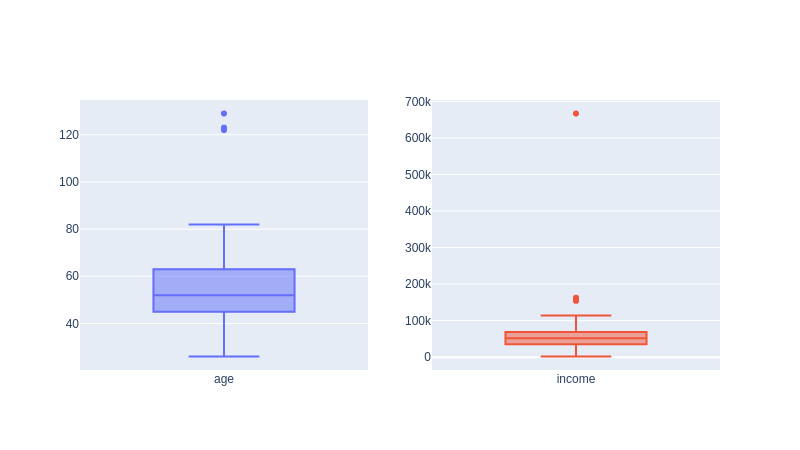

In [22]:
fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(go.Box(y = df['age'], name = 'age'), row = 1, col = 1)
fig.add_trace(go.Box(y = df['income'], name = 'income'), row = 1, col = 2)

fig.update_layout(showlegend = False)

gitly.show(fig)

У нас есть 4 клиента, которые являются исключениями. Один из них зарабатывает 666 666 долларов США, а троим из них больше 100 лет!

In [23]:
# Find outliers
outliers_age = df[df['age'] > 100].index

# Remove outliers
df.drop(outliers_age, inplace = True)

In [24]:
# Find outlier
outliers_income = df[df['income'] > 200000].index

# Remove outlier
df.drop(outliers_income, inplace = True)

In [25]:
df['education'].value_counts()

graduation    1126
phd            485
master         370
2n cycle       201
basic           54
Name: education, dtype: int64

С точки зрения образования, и «2-й цикл», и «магистр» относятся к одному и тому же уровню образования. Это основано на Европейском пространстве высшего образования (EHEA). Поэтому мы объединим два уровня образования под словом «магистр». Кроме того, «выпускной» немного вводит в заблуждение как уровень образования. Мы предположим, что это относится к «бакалавриату» и перефразируем его как таковое.

In [26]:
# Replace '2n cycle' with 'master'
df['education'] = df['education'].apply(lambda x: 'master' if str(x) == '2n cycle' else str(x))

In [27]:
# Replace 'graduation' with 'undergraduate'
df['education'] = df['education'].apply(lambda x: 'undergraduate' if str(x) == 'graduation' else str(x))

In [28]:
df['marital_status'].value_counts()

married     864
together    578
single      479
divorced    231
widow        77
alone         3
yolo          2
absurd        2
Name: marital_status, dtype: int64

С точки зрения семейного положения, 'yolo', 'alone', и 'absurd'могут быть истолкованы и приняты как означающие «не замужем», и поэтому эти статусы будут объединены в «холост».

In [29]:
# Merge 'yolo', 'absurd', and 'alone' under 'single'
df['marital_status'] = df['marital_status'].apply(lambda x: 'single' if str(x) in ['alone', 'yolo', 'absurd'] else str(x))

In [30]:
df['country'].value_counts()

sp     1094
sa      335
ca      268
aus     160
ind     147
ger     120
us      109
me        3
Name: country, dtype: int64

# **Check for missing values**

In [31]:
df.isnull().sum()

education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
acceptedcmp6            0
complain                0
country                 0
age                     0
enrollment_month        0
dtype: int64

У нас отсутствуют данные о доходах 24 наших клиентов.

**Определим X и Y**

In [32]:
X = df.drop('numstorepurchases', axis = 1)

In [33]:
y = df['numstorepurchases']

**Create test and train data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
transformer = ColumnTransformer(transformers = [('simple_imputer', SimpleImputer(strategy = 'median'), ['income'])], remainder = 'passthrough')

**Examine collinearity**

Включение функций, которые сильно коррелируют друг с другом или являются мультиколлинеарными, добавляет шум и неточность, поэтому нам нужно попытаться уменьшить это.

Создание тепловой карты корреляции — хороший способ визуализировать потенциальную коллинеарность. Эмпирическое правило состоит в том, что если корреляция между двумя независимыми переменными больше 0,8, тогда будет существовать мультиколлинеарность.

In [ ]:
X_tr = transformer.fit_transform(X_train)

In [ ]:
X_tr = pd.DataFrame(data = X_tr, columns = X.columns)

In [ ]:
from dython.nominal import associations

In [ ]:
complete_correlation = associations(X_tr, figsize = (32, 16))

Отсутствие мультиколлинеарности среди независимых переменных.

# **Какие факторы существенно влияют на количество покупок в магазине?**

Мы будем использовать модель CatBoostRegressor с numstorepurchases в качестве целевой переменной, а затем использовать методы объяснимости машинного обучения, чтобы получить представление о том, какие функции предсказывают количество покупок в магазине.

Мы создаем конвейер, который меняет любые отсутствующие значения, применяет надежный масштаб к функциям, преобразует любые категориальные функции в числовые, а затем подгоняет модель CatBoostRegressor.

In [95]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostRegressor

In [ ]:
numeric_columns = list(X_train.select_dtypes(exclude = ['object']).columns.values.tolist())
categorical_columns = list(X_train.select_dtypes(include = ['object']).columns.values.tolist())
numeric_transformer = Pipeline(steps = [('simple_imputer', SimpleImputer(strategy = 'median'))])
categorical_transformer = Pipeline(steps = [('one_hot_encoder', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers = [('numeric', numeric_transformer, numeric_columns),
                                                 ('categorical', categorical_transformer, categorical_columns)], remainder = 'passthrough')

bundled_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                     ('scaler', RobustScaler()),
                                     ('model', CatBoostRegressor(silent = True, random_state = 42))])

In [ ]:
bundled_pipeline.fit(X_train, y_train)

In [ ]:
y_pred = bundled_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test, y_pred)

**ELI5**

Из этого пайплайна непросто извлечь важные функции. Однако есть библиотека python, которая делает это очень простым, под названием ELI5.

Давайте используем ELI5 для извлечения важности функций из конвейера.

ELI5 необходимо знать все имена функций, чтобы определить важность функций. Применяя однократное кодирование к категориальным переменным в конвейере, мы вводим ряд новых функций. Поэтому сначала нам нужно извлечь эти имена функций и добавить их к известному списку числовых функций. В приведенном ниже коде для этого используется функция named_steps, встроенная в конвейеры scikit-learn.

In [ ]:
one_hot_columns = list(bundled_pipeline.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['one_hot_encoder'].get_feature_names_out(input_features = categorical_columns))

In [ ]:
numeric_features_list = list(numeric_columns)
numeric_features_list.extend(one_hot_columns)

In [96]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.7 MB/s 
     |████████████████████████████████| 133 kB 27.8 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a03e0326b1aada3b3333c49f5b240939fe05ac12a7bbf9851570cfb0ca26c244
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [ ]:
import eli5

To extract the feature importances we then simply need to run this line of code.

In [ ]:
eli5.explain_weights(bundled_pipeline.named_steps['model'], top = 50, feature_names = numeric_features_list)

Здесь мы отмечаем, что «mntwines» и «mntmeatproducts» являются наиболее важными функциями.

**Важные замечание**

* Чем точнее модель, тем надежнее рассчитанные значения важности.

* Вычисленные значения важности описывают, насколько важны функции для модели CatBoostRegressor. Это приблизительное представление о том, насколько важны функции в данных.

# **С точки зрения общего объема покупок дела в США значительно лучше, чем в остальном мире?**

In [83]:
totalpurchases = df[['numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'country']]

In [84]:
# Calculate the total number of purchases made through different channels
totalpurchases['totalpurchases'] = totalpurchases['numdealspurchases'] + totalpurchases['numwebpurchases'] + totalpurchases['numcatalogpurchases'] + totalpurchases['numstorepurchases']

In [85]:
average_purchases_per_country = totalpurchases.groupby('country').agg(total_purchases = ('totalpurchases', 'sum'))

In [86]:
average_purchases_per_country['total_customers'] = totalpurchases['country'].value_counts()

In [87]:
average_purchases_per_country['purchases_per_customer'] = np.floor(average_purchases_per_country['total_purchases'] / average_purchases_per_country['total_customers'])

In [88]:
average_purchases_per_country.assign(country = average_purchases_per_country.index.get_level_values('country'))

,total_purchases,total_customers,purchases_per_customer,country
country,,,,
aus,2314,160,14.0,aus
ca,4101,268,15.0,ca
ger,1788,120,14.0,ger
ind,2093,147,14.0,ind
me,59,3,19.0,me
sa,5102,335,15.0,sa
sp,16037,1094,14.0,sp
us,1761,109,16.0,us


In [89]:
average_purchases_per_country.reset_index(inplace = True)

In [90]:
average_purchases_per_country = average_purchases_per_country.sort_values(by = 'total_purchases', ascending = False)

In [91]:
import plotly.graph_objects as go

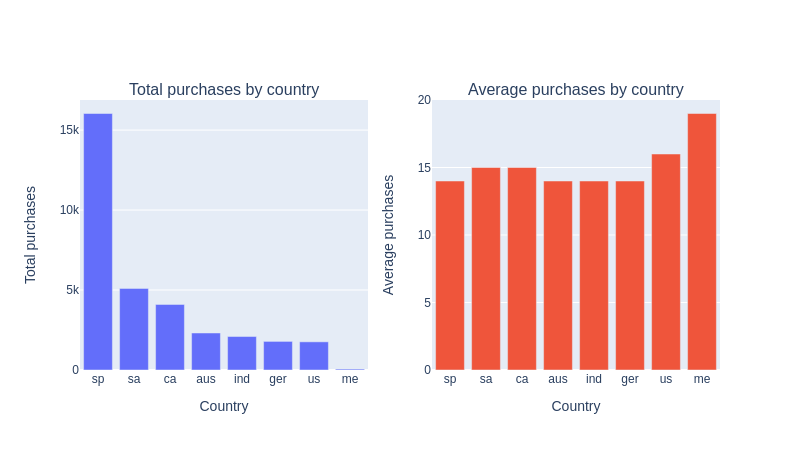

In [92]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('Total purchases by country', 'Average purchases by country'))

fig.add_trace(go.Bar(x = average_purchases_per_country['country'], y = average_purchases_per_country['total_purchases']), row = 1, col = 1)
fig.add_trace(go.Bar(x = average_purchases_per_country['country'], y = average_purchases_per_country['purchases_per_customer']), row = 1, col = 2)

fig['layout']['xaxis']['title'] = 'Country'
fig['layout']['xaxis2']['title'] = 'Country'
fig['layout']['yaxis']['title'] = 'Total purchases'
fig['layout']['yaxis2']['title'] = 'Average purchases'

fig.update_layout(showlegend = False)

gitly.show(fig)

С точки зрения общего количества покупок США, похоже, не занимает лидирующее место. На самом деле он самый низкий (исключая ME из-за всего 3 записей). Однако, если мы посмотрим на покупки, сделанные на человека в стране,
 то США лидируют в чарте.

# **Есть ли существенная связь между географическим регионом и успехом кампании?**

Мы будем использовать критерий хи-квадрат, чтобы определить связь между двумя категориальными переменными, страной и acceptcmp. Начнем с определения нулевой и альтернативной гипотез.

Нулевая гипотеза H0: Две переменные, country и acceptcmp, не зависят друг от друга.

Альтернативная гипотеза H1: две переменные связаны друг с другом.

In [ ]:
from scipy.stats import chi2_contingency

In [70]:
acceptedcmp1 = pd.crosstab(df['country'], df['acceptedcmp1'])

In [ ]:
c, p, dof, expected = chi2_contingency(acceptedcmp1)

In [ ]:
p

In [ ]:
acceptedcmp2 = pd.crosstab(df['country'], df['acceptedcmp2'])

In [ ]:
c, p, dof, expected = chi2_contingency(acceptedcmp2)

In [ ]:
p

In [ ]:
acceptedcmp3 = pd.crosstab(df['country'], df['acceptedcmp3'])

In [ ]:
c, p, dof, expected = chi2_contingency(acceptedcmp3)

In [ ]:
p

In [ ]:
acceptedcmp4 = pd.crosstab(df['country'], df['acceptedcmp4'])

In [ ]:
c, p, dof, expected = chi2_contingency(acceptedcmp4)

In [ ]:
p

In [ ]:
acceptedcmp5 = pd.crosstab(df['country'], df['acceptedcmp5'])

In [ ]:
c, p, dof, expected = chi2_contingency(acceptedcmp5)

In [ ]:
p

In [ ]:
acceptedcmp6 = pd.crosstab(df['country'], df['acceptedcmp6'])

In [ ]:
c, p, dof, expected = chi2_contingency(acceptedcmp6)

In [ ]:
p

Результаты показывают, что между географическими регионами и успехом кампании нет существенной связи, при этом p-значение для всех стран во всех маркетинговых кампаниях превышает 0,05. Это указывает на недостаточность доказательств, чтобы отвергнуть нулевую гипотезу о том, что географические регионы не имеют отношения к успеху маркетинговой кампании.

Мы можем дополнительно проверить это, построив график уровня принятия кампании в разных странах.

In [65]:
acceptedcmp_by_country = df.groupby('country').agg(acceptedcmp1 = ('acceptedcmp1', 'mean'), 
                                                   acceptedcmp2 = ('acceptedcmp2', 'mean'),
                                                   acceptedcmp3 = ('acceptedcmp3', 'mean'),
                                                   acceptedcmp4 = ('acceptedcmp4', 'mean'),
                                                   acceptedcmp5 = ('acceptedcmp5', 'mean'),
                                                   acceptedcmp6 = ('acceptedcmp6', 'mean')).reset_index()

In [66]:
acceptedcmp_by_country

,country,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp6
0,aus,0.043750,0.000000,0.056250,0.037500,0.081250,0.143750
1,ca,0.067164,0.022388,0.067164,0.089552,0.078358,0.141791
2,ger,0.058333,0.016667,0.083333,0.091667,0.066667,0.141667
3,ind,0.047619,0.013605,0.088435,0.074830,0.040816,0.088435
4,me,0.000000,0.000000,0.333333,0.000000,0.000000,0.666667
5,sa,0.059701,0.011940,0.062687,0.059701,0.062687,0.155224
6,sp,0.071298,0.014625,0.075868,0.081353,0.080439,0.160878
7,us,0.064220,0.000000,0.073394,0.055046,0.045872,0.119266


In [67]:
acceptedcmp_by_country = pd.melt(acceptedcmp_by_country.reset_index(), id_vars = 'country', value_vars = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp6'])

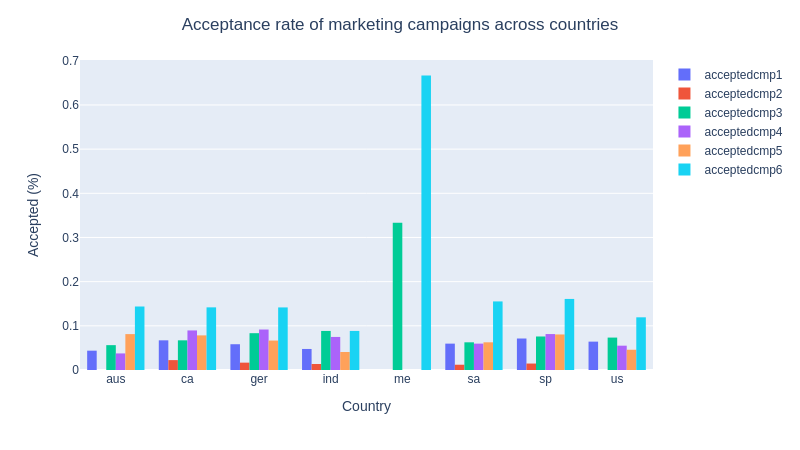

In [68]:
fig = px.histogram(acceptedcmp_by_country, x = 'country', y = 'value', color = 'variable', barmode = 'group')

fig.update_layout(title_text = 'Acceptance rate of marketing campaigns across countries', title_x = 0.5)

fig.update_layout(xaxis_title = 'Country')
fig.update_layout(yaxis_title = 'Accepted (%)')

fig.update_layout(legend = {'title_text': ''})

gitly.show(fig)

Из приведенной выше диаграммы видно, что уровень одобрения (%) каждой кампании в разных странах, как правило, довольно низок и довольно одинаков. Таким образом, это имеет смысл и еще раз подтверждает наш вывод о том, что «страна» не является важной характеристикой для прогнозирования успеха кампании.

Обратите внимание, что набор данных содержит только 3 точки данных о клиентах для Мексики, поэтому уровень одобрения кажется высоким (т. Е. Если 1 клиент принимает кампанию, показатель успеха уже будет на уровне 33%).

# **1. Какая маркетинговая кампания наиболее успешна?**

In [49]:
accepted_cmp = pd.DataFrame(df[['acceptedcmp1', 
                                'acceptedcmp2', 
                                'acceptedcmp3', 
                                'acceptedcmp4', 
                                'acceptedcmp5', 
                                'acceptedcmp6']].mean() * 100, columns = ['accepted_(%)']).sort_values(by = 'accepted_(%)', ascending = False).reset_index()

In [50]:
accepted_cmp.reset_index(inplace = True)

In [51]:
accepted_cmp = accepted_cmp.rename(columns = {'index': 'marketing_campaign', 'level_0': 'index'})

In [52]:
accepted_cmp.set_index('index', inplace = True)

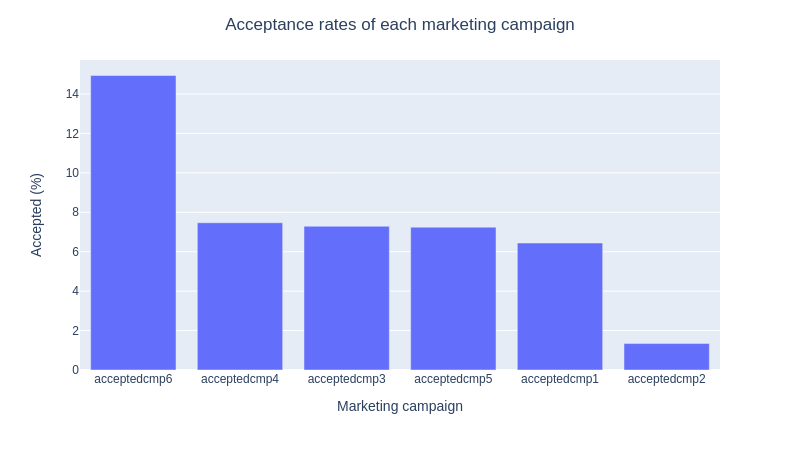

In [55]:
fig = px.bar(accepted_cmp, x = 'marketing_campaign', y = 'accepted_(%)')

fig.update_layout(title_text = 'Acceptance rates of each marketing campaign', title_x = 0.5)

fig.update_layout(xaxis_title = 'Marketing campaign')
fig.update_layout(yaxis_title = 'Accepted (%)')

gitly.show(fig)

Основываясь на приведенной выше диаграмме, мы можем сделать вывод, что самая последняя кампания является самой успешной.

# **2. Как выглядит средний клиент этой компании?**

**2.1 Categorical features**

**2.1.1 Education**

In [56]:
education = df.groupby('education').agg(count = ('education', 'count'))

In [57]:
education.assign(education = education.index.get_level_values('education'))

,count,education
education,,
basic,54,basic
master,571,master
phd,485,phd
undergraduate,1126,undergraduate


In [58]:
education.reset_index(inplace = True)

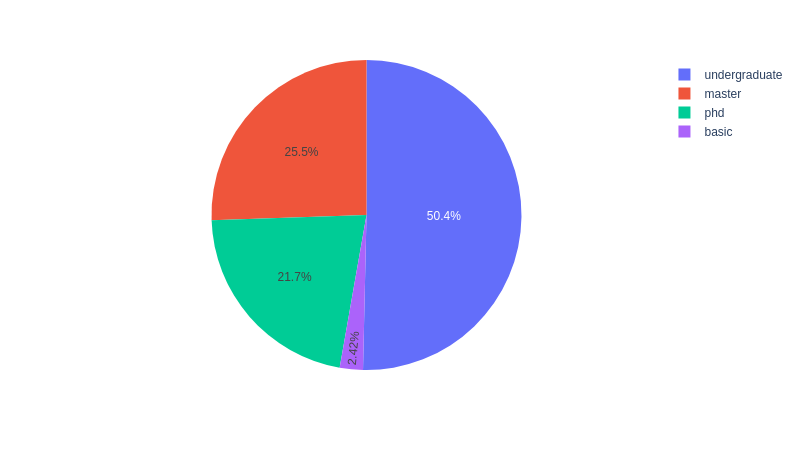

In [59]:
fig = px.pie(education, values = 'count', names = 'education')

gitly.show(fig)

В целом, большинство клиентов имеют высшее образование (50,4%).

**2.1.2 Семейный стату**

In [60]:
marital_status = df.groupby('marital_status').agg(count = ('marital_status', 'count'))

In [61]:
marital_status.assign(marital_status = marital_status.index.get_level_values('marital_status'))

,count,marital_status
marital_status,,
divorced,231,divorced
married,864,married
single,486,single
together,578,together
widow,77,widow


In [62]:
marital_status.reset_index(inplace = True)

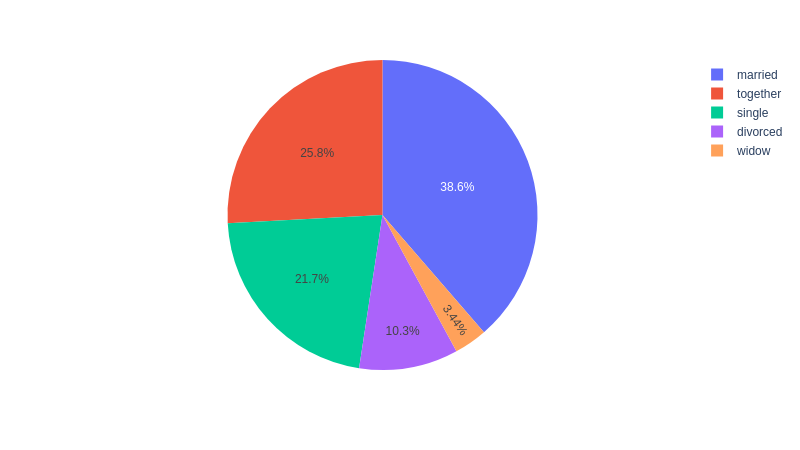

In [63]:
fig = px.pie(marital_status, values = 'count', names = 'marital_status')

gitly.show(fig)

Почти 40% клиентов состоят в браке, 25,8% живут вместе, а 21,7% не замужем.

**2.1.3 Country**

In [77]:
country = df.groupby('country').agg(count = ('country', 'count'))

In [78]:
country.assign(country = country.index.get_level_values('country'))

,count,country
country,,
aus,160,aus
ca,268,ca
ger,120,ger
ind,147,ind
me,3,me
sa,335,sa
sp,1094,sp
us,109,us


In [79]:
country.reset_index(inplace = True)

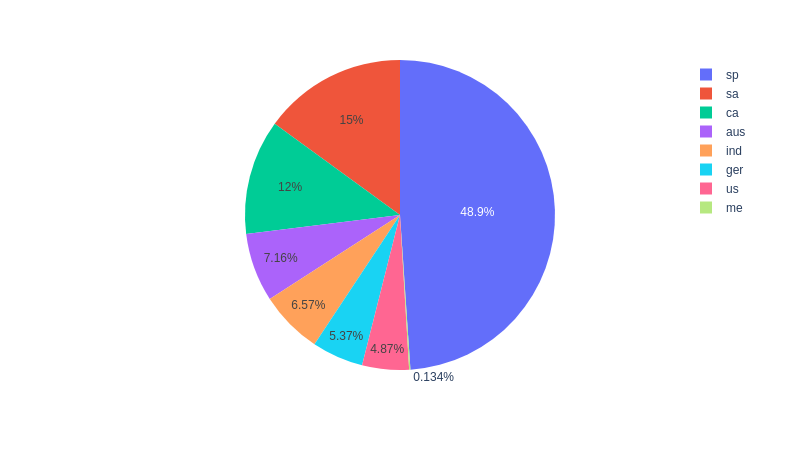

In [80]:
fig = px.pie(country, values = 'count', names = 'country')

gitly.show(fig)

Почти половина клиентов из Испании. Следующим по величине пулом клиентов является ЮАР (Южная Африка) с 15%, затем следует третья СА (Канада) с 12%.

**2.1.4 Dependents**

In [36]:
dependents = df[['kidhome', 'teenhome']].value_counts().reset_index()

In [37]:
dependents['index'] = np.arange(1, dependents.shape[0] + 1)

In [38]:
dependents = dependents.set_index('index')

In [39]:
dependents['kidhome'] = dependents['kidhome'].astype('string') + 'kid' 

In [40]:
dependents['kidhome'] = dependents['kidhome'].replace(to_replace = r'(kid)', value = r' \1', regex = True)

In [41]:
dependents['teenhome'] = dependents['teenhome'].astype('string') + 'teen' 

In [42]:
dependents['teenhome'] = dependents['teenhome'].replace(to_replace = r'(teen)', value = r' \1', regex = True)

In [43]:
dependents['dependenthome'] = dependents['kidhome']  + ' & ' + dependents['teenhome']

In [44]:
dependents = dependents.rename(columns = {0: 'count'})

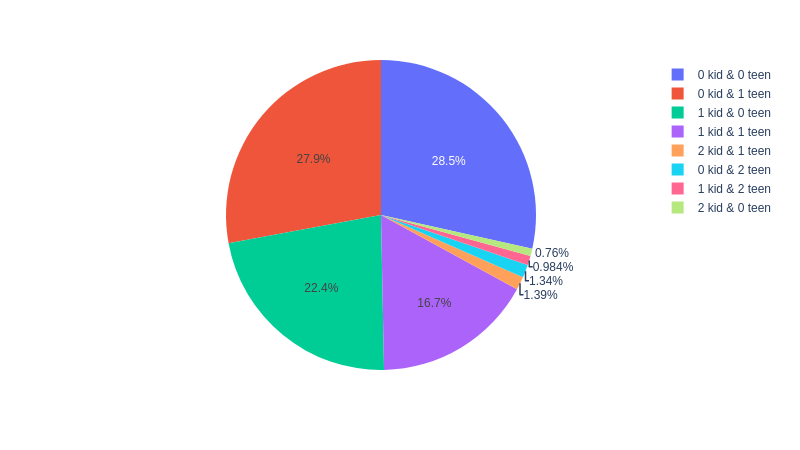

In [76]:
fig = px.pie(dependents, values = 'count', names = 'dependenthome')

gitly.show(fig)

* Только у 28,5% клиентов нет детей (хотя бы ребенок или подросток в семье).

* 71,5% клиентов имеют в семье хотя бы 1 ребенка или 1 подростка.

**2.2 Numerical features**

In [73]:
numerical_features = pd.DataFrame((df[['age', 'income']].mean()))

In [74]:
numerical_features = numerical_features.rename(columns = {0: 'numerical_feature'})

In [75]:
numerical_features

,numerical_feature
age,53.101968
income,51958.810579


Средний покупатель...

* 53 года
* из Испании
* высшее образование
* зарабатывает около 52 000 долларов США
* состоит в отношениях, т.е. состоит в браке или вместе
* имеет по крайней мере ребенка (ребенка или подростка)

In [46]:
 !pip install PyMySQL
 !pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.5 MB 1.4 MB/s 


In [47]:
# Import dataframe into MySQL
import sqlalchemy
database_username = 'MGPU_ADEU_115'
database_password = '15490845'
database_ip = '95.131.149.21'
database_name = 'MGPU_ADEU_115'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
dependents.to_sql(con=database_connection, name='dependents', if_exists='replace')

8

In [72]:
# Import dataframe into MySQL
import sqlalchemy
database_username = 'MGPU_ADEU_115'
database_password = '15490845'
database_ip = '95.131.149.21'
database_name = 'MGPU_ADEU_115'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
accepted_cmp.to_sql(con=database_connection, name='accepted_cmp', if_exists='replace')

6

In [ ]:
# Import dataframe into MySQL
import sqlalchemy
database_username = 'MGPU_ADEU_115'
database_password = '15490845'
database_ip = '95.131.149.21'
database_name = 'MGPU_ADEU_115'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
average_purchases_per_country.to_sql(con=database_connection, name='average_country', if_exists='replace')

In [ ]:
# Import dataframe into MySQL
import sqlalchemy
database_username = 'MGPU_ADEU_115'
database_password = '15490845'
database_ip = '95.131.149.21'
database_name = 'MGPU_ADEU_115'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
acceptedcmp_by_country.to_sql(con=database_connection, name='acceptedcmp_by_country', if_exists='replace')

In [ ]:
# Import dataframe into MySQL
import sqlalchemy
database_username = 'MGPU_ADEU_115'
database_password = '15490845'
database_ip = '95.131.149.21'
database_name = 'MGPU_ADEU_115'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
education.to_sql(con=database_connection, name='education1', if_exists='replace')

In [ ]:
# Import dataframe into MySQL
import sqlalchemy
database_username = 'MGPU_ADEU_115'
database_password = '15490845'
database_ip = '95.131.149.21'
database_name = 'MGPU_ADEU_115'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
marital_status.to_sql(con=database_connection, name='marital_status', if_exists='replace')

In [ ]:
# Import dataframe into MySQL
import sqlalchemy
database_username = 'MGPU_ADEU_115'
database_password = '15490845'
database_ip = '95.131.149.21'
database_name = 'MGPU_ADEU_115'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
country.to_sql(con=database_connection, name='country', if_exists='replace')

In [ ]:
# Import dataframe into MySQL
import sqlalchemy
database_username = 'MGPU_ADEU_115'
database_password = '15490845'
database_ip = '95.131.149.21'
database_name = 'MGPU_ADEU_115'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
df.to_sql(con=database_connection, name='df', if_exists='replace')